In [1]:
# 参考：https://nw.tsuda.ac.jp/lec/dijkstra/
from IPython.display import Image, display_png

In [2]:
import heapq

class Dijkstra():
    """ ダイクストラ法
    重み付きグラフにおける単一始点最短路アルゴリズム
    
    * 使用条件
        - 負のコストがないこと
        - 有向グラフ、無向グラフともにOK
    
    * 計算量はO(E*log(V))
    
    * ベルマンフォード法より高速なので、負のコストがないならばこちらを使うとよい
    """    
    def __init__(self, V):
        """ 重み付き有向辺
        無向辺を表現したいときは、_fromと_toを逆にした有向辺を加えればよい
    
        Args:
            V(int): 頂点の数
        """
        self.graph = [[] for i in range(V)]  # 隣接リストgraph[u][i] := 頂点uのi個目の隣接辺
        self._E = 0  # 辺の数
        self._V = V  # 頂点の数

    @property
    def E(self):
        """ 辺数
        無向グラフのときは、辺数は有向グラフの倍になる
        """
        return self._E
    
    @property
    def V(self):
        """ 頂点数 """
        return self._V
    
    def add(self, u, v, cost):
        """頂点uから頂点vへのコストはcost"""
        self.graph[u].append((v, cost))
        self._E += 1
        
    def shortest_path(self, s):
        """ 始点sから頂点iまでの最短路を格納したリストを返す 
        Args:
            s(int): 始点s
        Returns:
            dist(list): dist[i] := 始点sから頂点iまでの最短コストを格納したリスト。
                     到達不可の場合、値はfloat('inf')
        """
        dist = [float('inf')] * self.V
        dist[s] = 0
        que = []  # プライオリティキュー
        heapq.heappush(que, (0, s))  # 始点の(最短距離の候補, 頂点番号)をキューに追加する（キューの中身は最短距離の候補が小さい順に並ぶ）
    
        while len(que) != 0:
            d, u = heapq.heappop(que)
            # キューに格納されている最短経路の候補がdistの距離よりも大きければ、他の経路で最短経路が存在するので、処理をスキップ
            if dist[u] < d: continue
    
            for v, cost in self.graph[u]:
                # 頂点uに隣接する各頂点に対して、頂点uを経由した場合の距離を計算し、今までの距離(dist)よりも小さければ更新する
                if dist[v] > dist[u] + cost:
                    dist[v] = dist[u] + cost  # distの更新
                    heapq.heappush(que, (dist[v], v))  # キューに新たな最短経路の候補(最短距離, 頂点番号)の情報をpush
        return dist

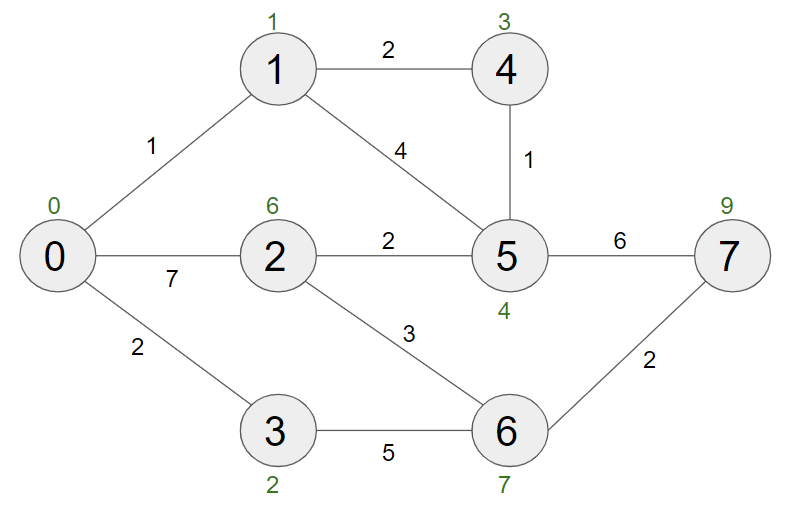

In [3]:
# 例1：無向グラフ
display_png(Image("img/Dijkstra1.PNG"))

In [4]:
V = 8  # 頂点数
djk = Dijkstra(V)
djk.add(0, 1, 1), djk.add(1, 0, 1)
djk.add(0, 2, 7), djk.add(2, 0, 7)
djk.add(0, 3, 2), djk.add(3, 0, 2)
djk.add(1, 4, 2), djk.add(4, 1, 2)
djk.add(1, 5, 4), djk.add(5, 1, 4)
djk.add(2, 5, 2), djk.add(5, 2, 2)
djk.add(2, 6, 3), djk.add(6, 2, 3)
djk.add(3, 6, 5), djk.add(6, 3, 5)
djk.add(4, 5, 1), djk.add(5, 4, 1)
djk.add(5, 7, 6), djk.add(7, 5, 6)
djk.add(6, 7, 2), djk.add(7, 6, 2)

dist = djk.shortest_path(0)  # 始点0からの最短距離を求める

for i in range(V):
    print(f"頂点{i}までの最短距離は{dist[i]}")

頂点0までの最短距離は0
頂点1までの最短距離は1
頂点2までの最短距離は6
頂点3までの最短距離は2
頂点4までの最短距離は3
頂点5までの最短距離は4
頂点6までの最短距離は7
頂点7までの最短距離は9


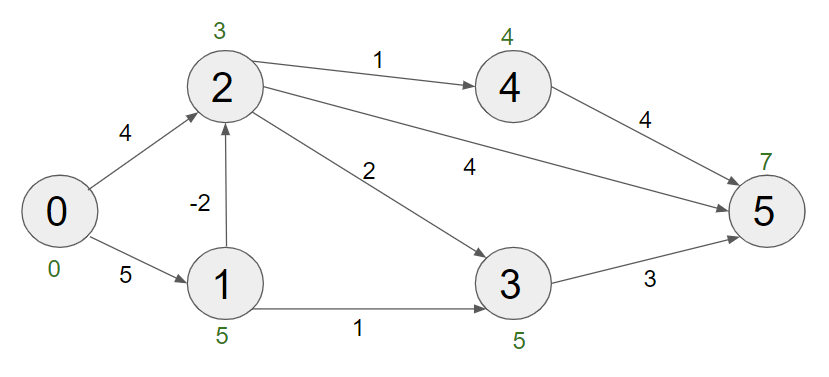

In [5]:
# 例2：有向グラフ（負の閉路なし）
display_png(Image("img/bellmanford1.PNG"))

In [6]:
V = 6  # 頂点数
djk = Dijkstra(V)
djk.add(0, 1, 5)
djk.add(0, 2, 4)
djk.add(1, 2, -2)
djk.add(1, 3, 1)
djk.add(2, 3, 2)
djk.add(2, 4, 1)
djk.add(2, 5, 4)
djk.add(3, 5, 3)
djk.add(4, 5, 4)

dist = djk.shortest_path(0)  # 始点0からの最短距離を求める

for i in range(V):
    print(f"頂点{i}までの最短距離は{dist[i]}")

頂点0までの最短距離は0
頂点1までの最短距離は5
頂点2までの最短距離は3
頂点3までの最短距離は5
頂点4までの最短距離は4
頂点5までの最短距離は7


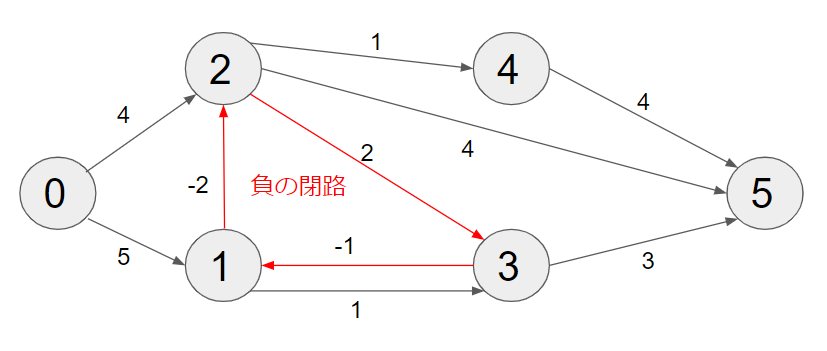

In [7]:
# 例3：有向グラフ（負の閉路あり）
display_png(Image("img/bellmanford2.PNG"))

In [8]:
V = 6  # 頂点数
djk = Dijkstra(V)
djk.add(0, 1, 5)
djk.add(0, 2, 4)
djk.add(1, 2, -2)
djk.add(1, 3, 1)
djk.add(2, 3, 2)
djk.add(2, 4, 1)
djk.add(2, 5, 4)
djk.add(3, 1, -1)
djk.add(3, 5, 3)
djk.add(4, 5, 4)

""" 負の閉路があるので、最短距離の計算が収束せず、無限ループしてしまう """
# dist = djk.shortest_path(0)  # 始点0からの最短距離を求める

# for i in range(V):
#     print(f"頂点{i}までの最短距離は{dist[i]}")


' 負の閉路があるので、最短距離の計算が収束せず、無限ループしてしまう '

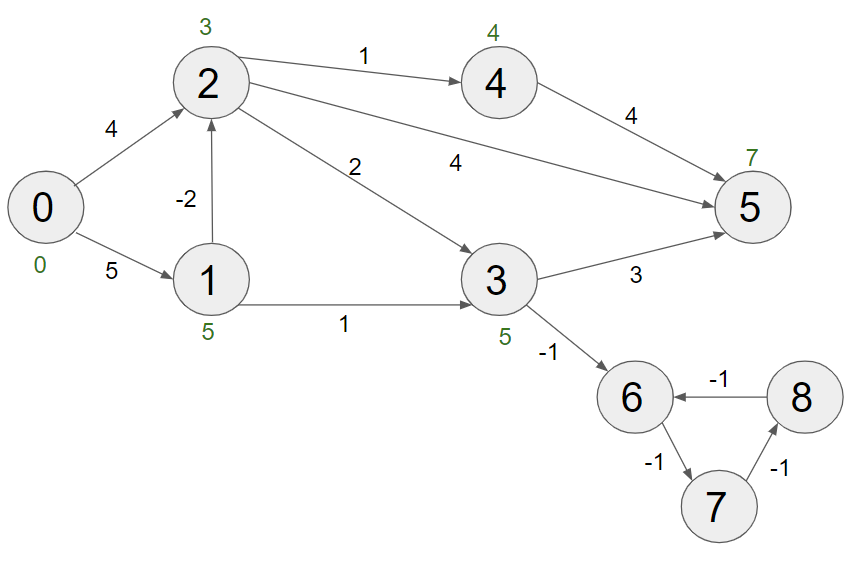

In [9]:
# 例4：有向グラフ（負の閉路あり）
display_png(Image("img/bellmanford3.PNG"))